In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,NaN,NaN,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,NaN,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,NaN,1.3,2.0,0.0,3.0
268,NaN,57.0,NaN,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	14
float64		column 2	10
float64		column 3	16
float64		column 4	16
float64		column 5	18
float64		column 6	9
float64		column 7	20
float64		column 8	7
float64		column 9	19
float64		column 10	17
float64		column 11	10
float64		column 12	9
float64		column 13	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,256.000000,260.000000,254.000000,254.000000,252.000000,261.000000,250.0000,263.000000,251.000000,253.000000,260.000000,261.000000,260.000000
mean,0.679688,54.411538,3.161417,131.149606,249.658730,0.153257,1.0240,149.703422,0.334661,1.065613,1.576923,0.689655,4.700000
std,0.467511,9.176301,0.958387,17.669374,51.930104,0.360927,0.9977,23.238792,0.472815,1.152139,0.613432,0.952450,1.939828
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.0000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.000000,3.000000,120.000000,212.750000,0.000000,0.0000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.0000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,278.000000,0.000000,2.0000,166.500000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.0000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

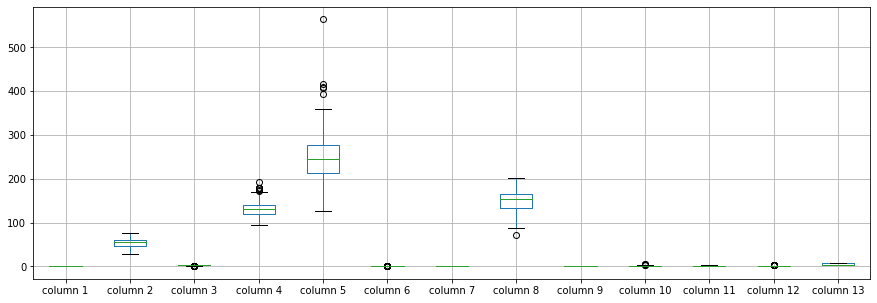

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.679688
column 2      54.411538
column 3       3.161417
column 4     131.149606
column 5     249.658730
column 6       0.153257
column 7       1.024000
column 8     149.703422
column 9       0.334661
column 10      1.065613
column 11      1.576923
column 12      0.689655
column 13      4.700000
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.074584,0.030206,-0.037640,-0.199883,0.060628,0.023882,-0.075298,0.197559,0.109790,0.065937,0.093727,0.408694
column 2,-0.074584,1.000000,0.058047,0.286864,0.231823,0.132066,0.136095,-0.411714,0.108221,0.184340,0.146051,0.371056,0.080326
column 3,0.030206,0.058047,1.000000,-0.073522,0.090647,-0.123949,0.091765,-0.326176,0.351024,0.188071,0.157288,0.214475,0.235089
column 4,-0.037640,0.286864,-0.073522,1.000000,0.154572,0.128837,0.088302,-0.025385,0.089384,0.179602,0.124728,0.071181,0.141969
column 5,-0.199883,0.231823,0.090647,0.154572,1.000000,0.017681,0.212088,-0.011639,0.062803,0.025585,-0.002091,0.138424,0.040600
column 6,0.060628,0.132066,-0.123949,0.128837,0.017681,1.000000,0.089392,0.029876,-0.001373,-0.021683,0.059231,0.132714,0.038715
column 7,0.023882,0.136095,0.091765,0.088302,0.212088,0.089392,1.000000,-0.045199,0.084201,0.094354,0.154107,0.133986,-0.005042
column 8,-0.075298,-0.411714,-0.326176,-0.025385,-0.011639,0.029876,-0.045199,1.000000,-0.380446,-0.345982,-0.372175,-0.274341,-0.242436
column 9,0.197559,0.108221,0.351024,0.089384,0.062803,-0.001373,0.084201,-0.380446,1.000000,0.301586,0.269990,0.149693,0.318633
column 10,0.109790,0.184340,0.188071,0.179602,0.025585,-0.021683,0.094354,-0.345982,0.301586,1.000000,0.603333,0.246333,0.297396


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+55,13+55+55,13+55+55+55,13+55+55+55+55,13+55+55+55+55+55,13+55+55+55+55,13+55+55+55,13+55+55,13+55,13], vae_layer = False, seed = 55)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 578.4014053344727
Epoch: 1 , loss: 579.6505661010742
Epoch: 2 , loss: 575.0334587097168
Epoch: 3 , loss: 577.515567779541
Epoch: 4 , loss: 577.5694580078125
Epoch: 5 , loss: 577.3889808654785
Epoch: 6 , loss: 579.4284133911133
Epoch: 7 , loss: 580.1130065917969
Epoch: 8 , loss: 577.2934112548828
Epoch: 9 , loss: 577.1128349304199
Epoch: 10 , loss: 577.3191528320312
Epoch: 11 , loss: 576.5528411865234
Epoch: 12 , loss: 578.9248161315918
Epoch: 13 , loss: 577.2087364196777
Epoch: 14 , loss: 580.1309089660645
Epoch: 15 , loss: 577.8048477172852
Epoch: 16 , loss: 576.5776996612549
Epoch: 17 , loss: 575.5388298034668
Epoch: 18 , loss: 576.8744125366211
Epoch: 19 , loss: 575.4937782287598
Epoch: 20 , loss: 574.5227928161621
Epoch: 21 , loss: 573.204719543457
Epoch: 22 , loss: 570.7714958190918
Epoch: 23 , loss: 575.6416053771973
Epoch: 24 , loss: 567.5508651733398
Epoch: 25 , loss: 563.366268157959
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.328231
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,-86.938496,-208.03159,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
266,0.000000,0.0,0.000000,-75.342159,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
267,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.076753,0.0,0.0,0.0,0.0
268,-0.134831,0.0,-1.347209,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1076.1587367220811, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.1987456967101448

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4.000000,130.000000,322.00000,0.0,2.0,109.0,0.000000,2.4,2.0,3.0,3.0
1,0.000000,67.0,3.000000,115.000000,564.00000,0.0,2.0,160.0,0.000000,1.6,2.0,0.0,7.0
2,1.000000,57.0,2.000000,124.000000,261.00000,0.0,0.0,141.0,0.000000,0.3,1.0,0.0,7.0
3,1.000000,64.0,4.000000,41.061504,54.96841,0.0,0.0,105.0,1.000000,0.2,2.0,1.0,7.0
4,0.000000,74.0,2.000000,120.000000,269.00000,0.0,2.0,121.0,1.000000,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,3.000000,172.000000,199.00000,1.0,0.0,162.0,0.000000,0.5,1.0,0.0,7.0
266,1.000000,44.0,2.000000,44.657841,263.00000,0.0,0.0,173.0,0.000000,0.0,1.0,0.0,7.0
267,0.000000,56.0,2.000000,140.000000,294.00000,0.0,2.0,153.0,0.076753,1.3,2.0,0.0,3.0
268,0.865169,57.0,2.652791,140.000000,192.00000,0.0,0.0,148.0,0.000000,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_C_5(imp).xlsx", index=False, header=False)